# `ALLIN PODCAST ANALYSIS (DATASCIENCE PR)`

# Packages and Theme

In [1]:
import json
import numpy as np

from dateutil import parser
from pandas_profiling import ProfileReport

import pandas as pd
import matplotlib.pyplot as plt


#importing the style package
from matplotlib import style

#Theme
plt.style.use('seaborn')

#color styles
highColor = "#6930C3"
lowColor = "#EB596E"

#print(plt.style.available)

# Load Data

In [2]:
#load and format data
file = "all-in_podcast.json"
data = None
with open(file, 'r') as f:
    data = json.load(f)

channel_id, stats = data.popitem()

channel_stats = stats["channel_statistics"]
video_stats = stats["video_data"]

In [3]:
#video_stats

# Channel Statistics

In [4]:
#Video statistics, sort videos by views
sorted_vids = sorted(video_stats.items(), key=lambda item: int(item[1]["viewCount"]), reverse=True)


stats = []
for vid in sorted_vids:
   
    video_id = vid[0]
    title = vid[1]["title"]
    views = int(vid[1]["viewCount"])
    likes = int(vid[1]["likeCount"])
    comments = int(vid[1]["commentCount"])
    timestamp = parser.parse(vid[1]["publishedAt"])

    
    
    stats.append([title,views,likes,comments,timestamp])

#create dataframe
df = pd.DataFrame(stats, columns=["title", "views", "likes", "comments", "timestamp"])

#Channel Statistics
total_views = int(channel_stats["viewCount"])
total_subscribers = int(channel_stats["subscriberCount"])
total_videos = int(channel_stats["videoCount"])

print("\nSummary Stats\n")
print(f"Total Views: {total_views:,} \nTotal Subs: {total_subscribers:,} \nTotal Videos: {total_videos:,}")
print(f"Total Channel Likes: {df['likes'].sum():,}")
print(f"Total Channel Comments: {df['comments'].sum():,}")

print(f"\nAverage Summary\n")
avg_views = round(df['views'].mean(),2)
avg_likes = round(df['likes'].mean(),2)
avg_comments = round(df['comments'].mean(),2)
print(f"Average Views per video: {avg_views:,}")
print(f"Average Likes per video: {avg_likes:,}")
print(f"Average Comments per video: {avg_comments:,}")


Summary Stats

Total Views: 23,203,768 
Total Subs: 306,000 
Total Videos: 135
Total Channel Likes: 575,840
Total Channel Comments: 126,554

Average Summary

Average Views per video: 173,151.99
Average Likes per video: 4,297.31
Average Comments per video: 944.43


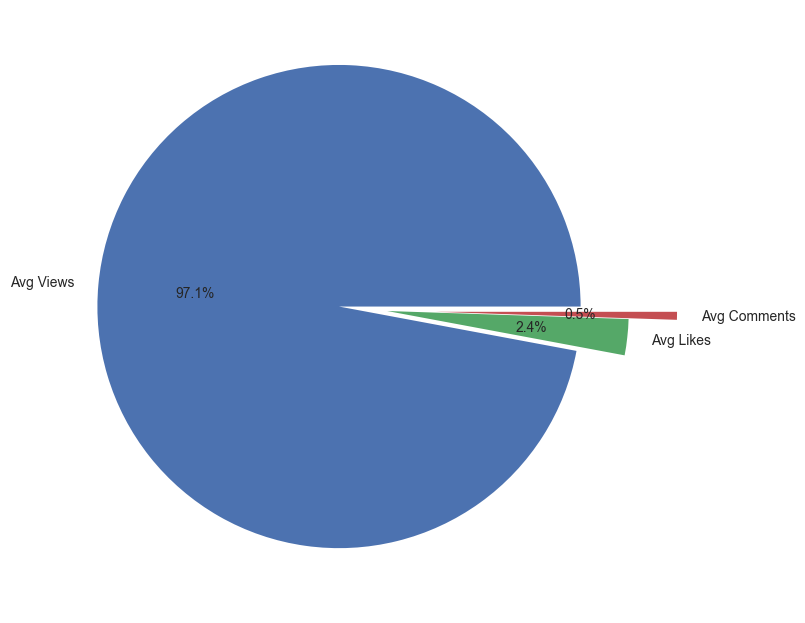

In [5]:
# Average Stats Pie Chart

plt.figure(figsize=(15,8), dpi=100)

labels = ["Avg Views", "Avg Likes", "Avg Comments"]
explode = [0.2,0,0.2]
values = [avg_views, avg_likes, avg_comments]











plt.pie(values, labels = labels, explode = explode, autopct='%1.1f%%')
plt.show() 






# Top 10 Video with most Views

In [6]:
df.describe()

,views,likes,comments
count,1.340000e+02,134.000000,134.000000
mean,1.731520e+05,4297.313433,944.432836
std,2.102482e+05,5031.301092,835.616565
min,9.613000e+03,228.000000,45.000000
25%,8.630475e+04,2296.750000,395.500000
50%,1.356070e+05,3556.000000,753.500000
75%,2.286012e+05,5326.750000,1246.000000
max,2.305524e+06,55534.000000,6802.000000


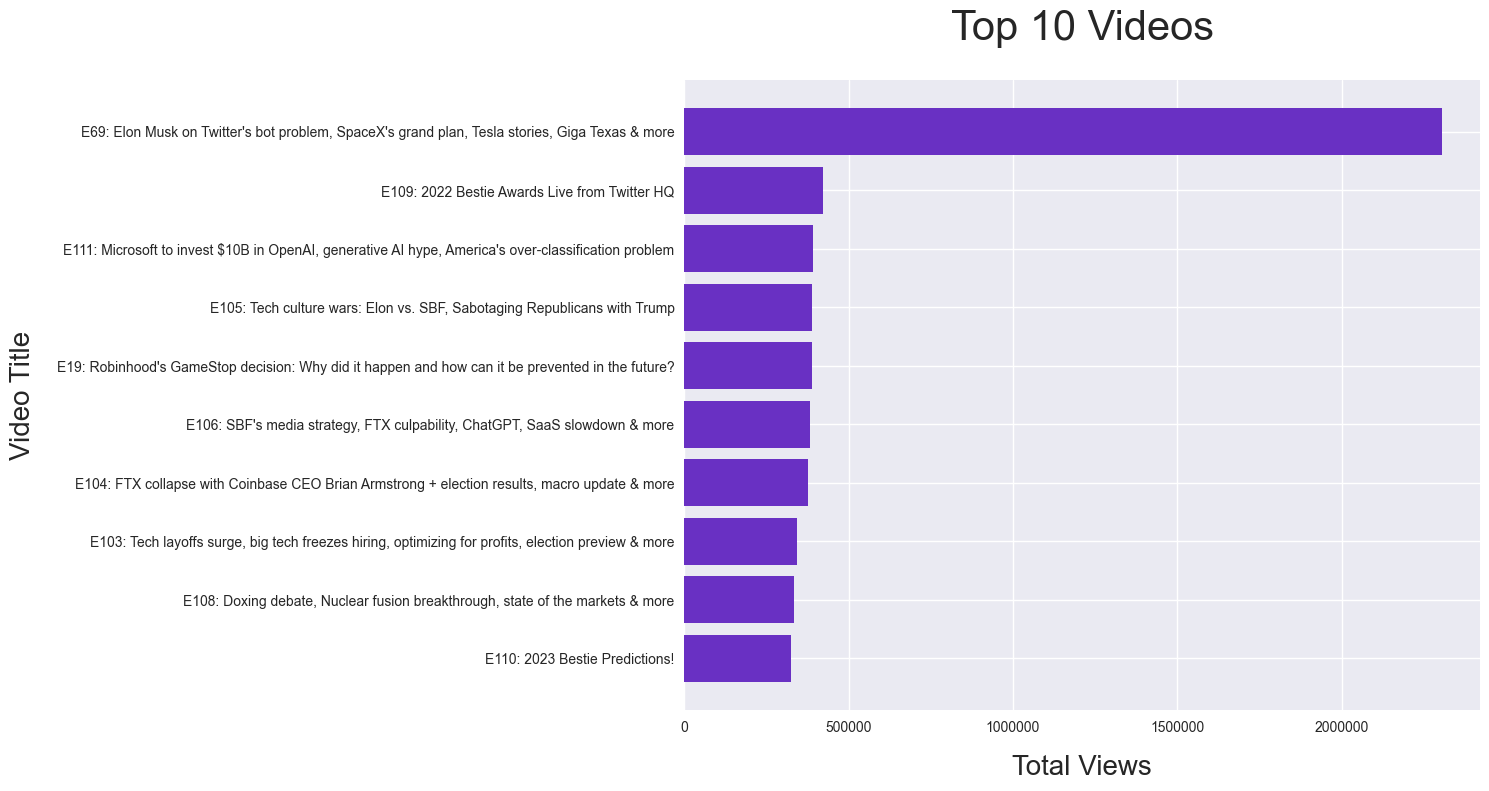

In [7]:

top10 = df.head(10).sort_values(by="views", ascending=True)

plt.figure(figsize=(15,8), dpi=100)
 
# creating the bar plot
plt.ticklabel_format(style='plain')
plt.barh(top10["title"], top10["views"], color=highColor)

plt.title("Top 10 Videos", y=1.05, fontsize=30)

plt.xlabel("Total Views", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 videos with least views

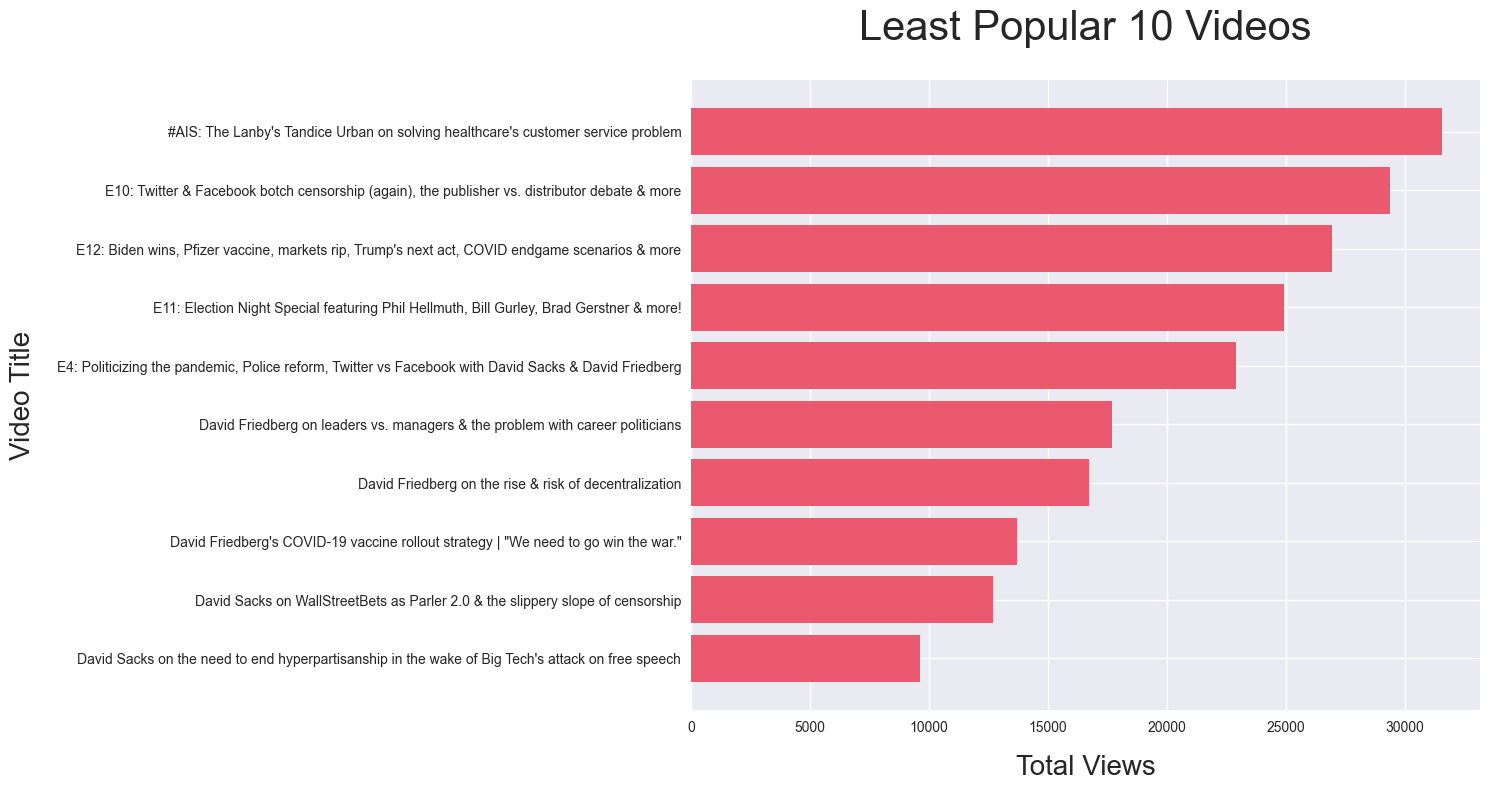

In [8]:
bottom10 = df.tail(10).sort_values(by='views', ascending=True)
plt.figure(figsize=(15,8), dpi=100)
 
# creating the bar plot
plt.ticklabel_format(style='plain')
plt.barh(bottom10["title"], bottom10["views"], color=lowColor)

plt.title("Least Popular 10 Videos", y=1.05, fontsize=30)
plt.xlabel("Total Views", labelpad=15, fontsize=20)
plt.ylabel("Video Title", labelpad=15, fontsize=20)

plt.tight_layout()
plt.show()

# Top 10 Videos with most Comments

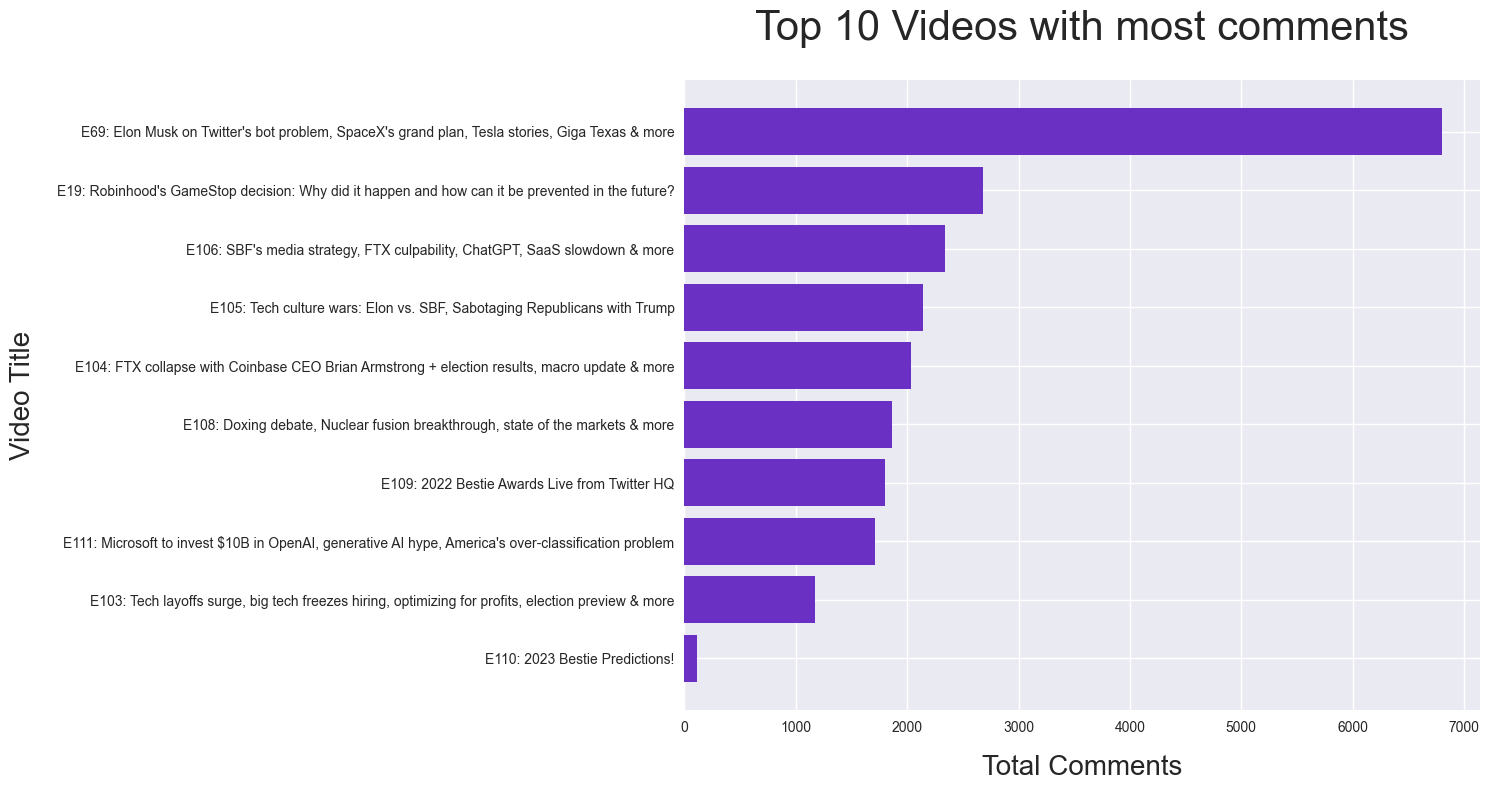

In [9]:
top10_comments = df.head(10).sort_values(by="comments", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.barh(top10_comments["title"], top10_comments["comments"], color=highColor)

plt.title("Top 10 Videos with most comments", fontsize=30, y=1.05)
plt.xlabel("Total Comments", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)


plt.tight_layout()
plt.show()

# Top 10 Videos with the Least Comments

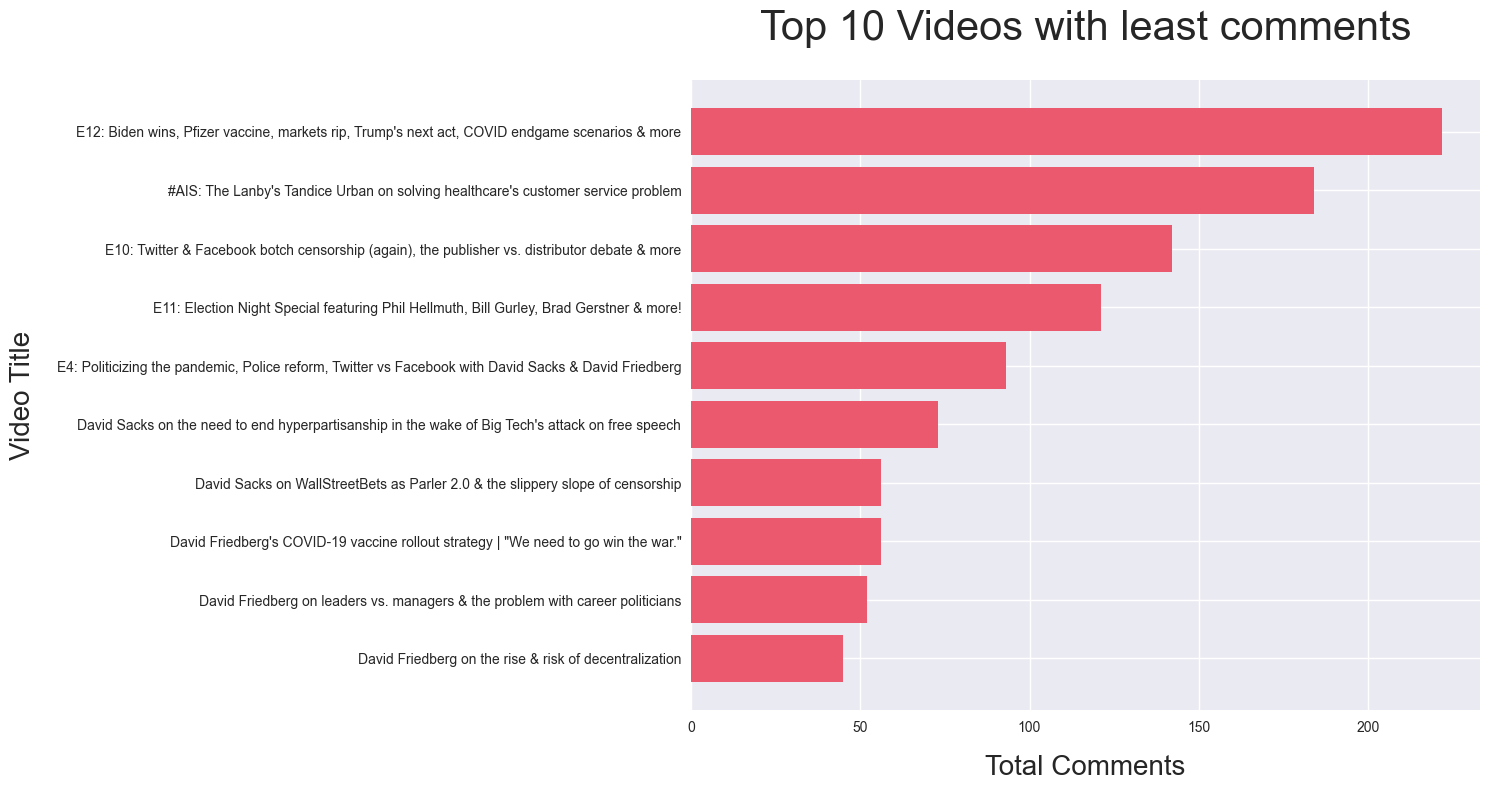

In [10]:
bottom10_least_comments = df.tail(10).sort_values(by="comments", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.ticklabel_format(style='plain')
plt.barh(bottom10_least_comments["title"], bottom10_least_comments["comments"], color=lowColor)

plt.title("Top 10 Videos with least comments", fontsize=30, y=1.05)

plt.xlabel("Total Comments", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 Videos with the most Likes


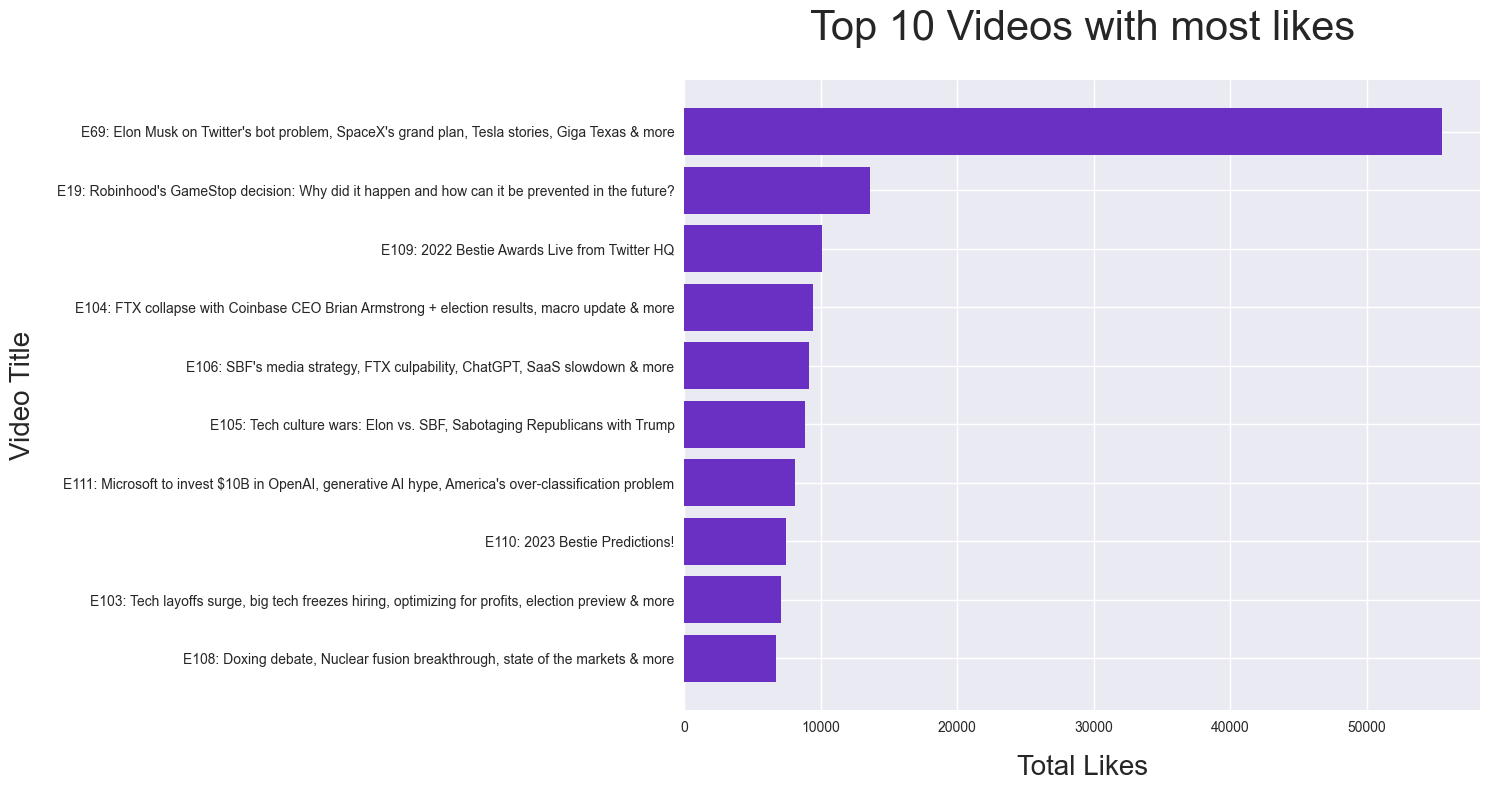

In [11]:
top10_likes = df.head(10).sort_values(by="likes", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.barh(top10_likes["title"], top10_likes["likes"], color=highColor)

plt.title("Top 10 Videos with most likes", fontsize=30, y=1.05)

plt.xlabel("Total Likes", fontsize=20, labelpad=15)
plt.ylabel("Video Title", fontsize=20, labelpad=15)

plt.tight_layout()
plt.show()

# Top 10 Videos with the least Likes


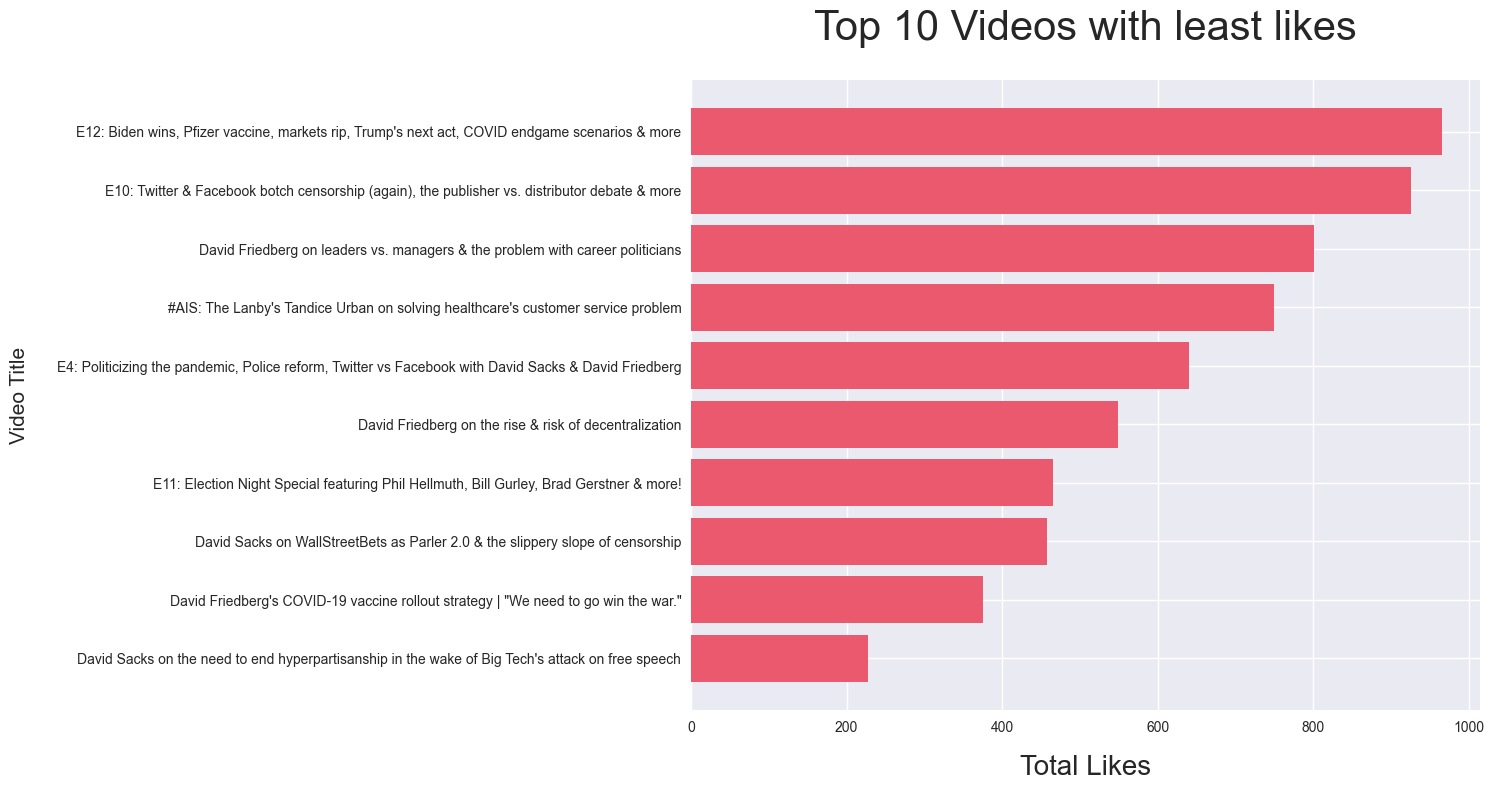

In [12]:
top10_least_likes = df.tail(10).sort_values(by="likes", ascending=True)
# creating the bar plot
plt.figure(figsize=(15,8), dpi=100)

plt.ticklabel_format(style='plain')
plt.barh(top10_least_likes["title"], top10_least_likes["likes"], color=lowColor)

plt.title("Top 10 Videos with least likes", fontsize=30, y=1.05)
plt.xlabel("Total Likes",fontsize=20, labelpad=15)
plt.ylabel("Video Title", labelpad=20, fontsize=15)

plt.tight_layout()
plt.show()

# Popular Tags

In [13]:
# Elon Search
elon = df[df['title'].str.contains('Elon')]
elon_avg_views = round(int(elon["views"].mean()),2)
elon_avg_likes = round(int(elon["likes"].mean()),2)
elon_avg_comments = round(int(elon["comments"].mean()),2)

tag_hits = len(elon["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nElon tag stats\n \nAverage Views: {elon_avg_views:,} \nAverage Likes: {elon_avg_likes:,}\
\nAverage Comments: {elon_avg_comments:,}")

Titles with this tag: 6

Elon tag stats
 
Average Views: 589,767 
Average Likes: 14,343
Average Comments: 2,154


In [14]:
# Biden Search
biden = df[df['title'].str.contains('Biden')]
biden_avg_views = round(int(biden["views"].mean()),2)
biden_avg_likes = round(int(biden["likes"].mean()),2)
biden_avg_comments = round(int(biden["comments"].mean()),2)

tag_hits = len(biden["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nBiden tag stats\n \nAverage Views: {biden_avg_views:,} \nAverage Likes: {biden_avg_likes:,}\
\nAverage Comments: {biden_avg_comments:,}")

Titles with this tag: 5

Biden tag stats
 
Average Views: 136,144 
Average Likes: 3,214
Average Comments: 816


In [15]:
# politics Search
pols = df[df['title'].str.contains('politic')]
pol_avg_views = round(float(pols["views"].mean()),2)
pol_avg_likes = round(float(pols["likes"].mean()),2)
pol_avg_comments = round(float(pols["comments"].mean()),2)

tag_hits = len(pols["title"])

print(f"Titles with this tag: {tag_hits}")
print(f"\nPolitics tag stats\n \nAverage Views: {pol_avg_views:,} \nAverage Likes: {pol_avg_likes:,}\
\nAverage Comments: {pol_avg_comments:,}")

Titles with this tag: 8

Politics tag stats
 
Average Views: 131,342.12 
Average Likes: 3,604.5
Average Comments: 651.25


# Summary Stats Using pandas-profiling

In [16]:
profile = ProfileReport(df, title="Allin YT Channel", html={'style':{'full_width':True}})

# Split Date column into date and time

In [17]:
#df

In [18]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [19]:
#df

# Published hour vs total views

In [20]:
hour = df.groupby([df['timestamp'].dt.hour]).views.sum().sort_values(ascending=True)



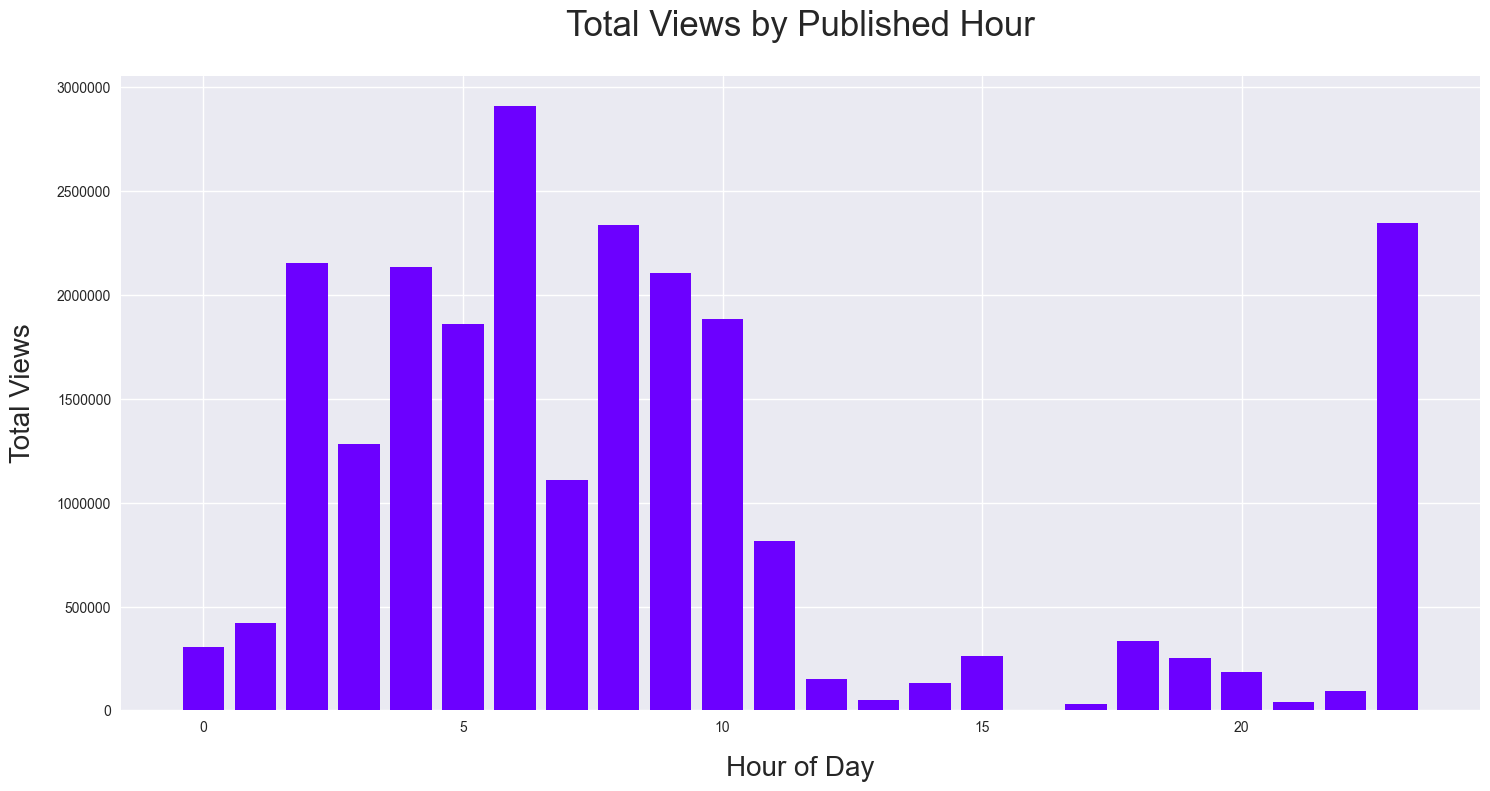

In [21]:

plt.figure(figsize=(15,8), dpi=100)
plt.ticklabel_format(style='plain')
plt.title("Total Views by Published Hour", y=1.05, fontsize=25)
plt.xlabel("Hour of Day",fontsize=20, labelpad=15)
plt.ylabel("Total Views", labelpad=15, fontsize=20)
plt.bar(hour.index, hour.values, color="#6C00FF")
plt.tight_layout()
plt.show()

In [63]:

# tag = vid[1]["tags"]